# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

1. Importing the required libraries for EDA:

In [1]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Loading the data into the data frame:

In [2]:
data = pd.read_excel('Online_Retail.xlsx')
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
data.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


3. Checking the types of data

In [4]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

4. Dropping irrelevant columns


In [5]:
data = data.drop(['Description', 'InvoiceNo'], axis=1)
data.head(5)

,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


5. Renaming the columns

In [6]:
data = data.rename(columns={"UnitPrice": "Price"})
data.head(5)

,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country
0,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


6. Dropping the duplicate rows

first we will show how many rows and columns we have:

In [7]:
data.shape

(541909, 6)

let's select all the duplicated values

In [8]:
duplicated_rows = data[data.duplicated()]
print(f"The number of duplicated rows : {duplicated_rows.shape}")

The number of duplicated rows : (5850, 6)


remove the duplicated values:

In [9]:
data.count()

StockCode      541909
Quantity       541909
InvoiceDate    541909
Price          541909
CustomerID     406829
Country        541909
dtype: int64

In [10]:
data = data.drop_duplicates()
data.head()

,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country
0,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
data.count()

StockCode      536059
Quantity       536059
InvoiceDate    536059
Price          536059
CustomerID     401562
Country        536059
dtype: int64

7. Dropping the missing or null values.

first let's see how many empty values we have

In [12]:
data.isnull().sum()

StockCode           0
Quantity            0
InvoiceDate         0
Price               0
CustomerID     134497
Country             0
dtype: int64

now let's remove the null values from dataFrame

In [13]:
data = data.dropna()
data.isnull().sum()

StockCode      0
Quantity       0
InvoiceDate    0
Price          0
CustomerID     0
Country        0
dtype: int64

In [14]:
data.count()

StockCode      401562
Quantity       401562
InvoiceDate    401562
Price          401562
CustomerID     401562
Country        401562
dtype: int64

we see that we have the exact the same number of rows in each column

8. Detecting Outliers

<Axes: xlabel='Price'>

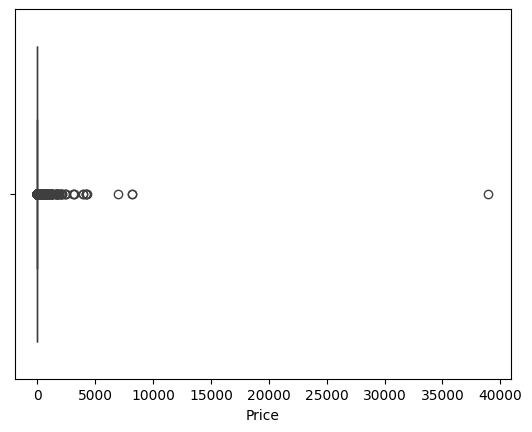

In [15]:
sns.boxplot(x=data['Price'])

<Axes: xlabel='Quantity'>

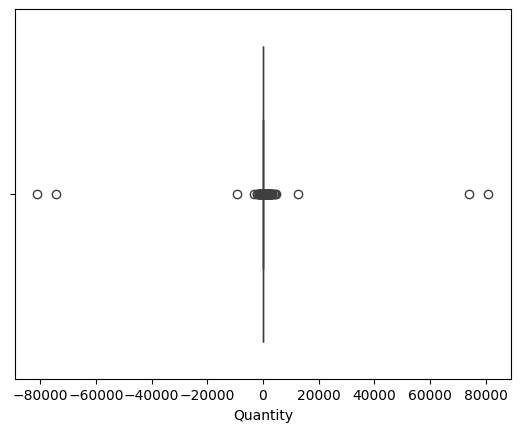

In [16]:
sns.boxplot(x=data['Quantity'])

In [17]:
# Q1 = data.quantile(0.25)
# Q3 = data.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

In [18]:
# df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(401562, 6)

9. Plot different features against one another (scatter), against frequency (histogram)

the sales trends over time. Identify the busiest months and days of the week in terms of sales.

the busiest month in terms of sales

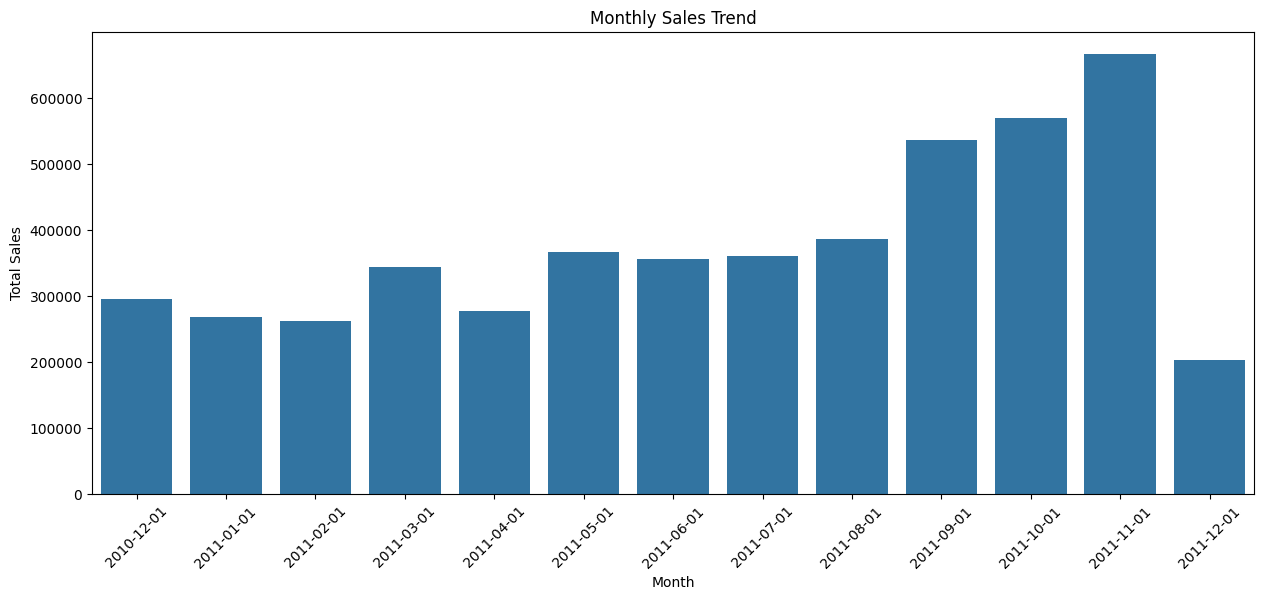

In [19]:
monthly_sales = data.groupby(data.InvoiceDate.dt.to_period('M'))['Quantity'].sum()
# create a bar plot for monthly sales
plt.figure(figsize=(15,6))
sns.barplot(x=monthly_sales.index.to_timestamp(), y=monthly_sales)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.show()

the busiest days in terms of sales

InvoiceDate
0     739287
1     912081
2     937828
3    1115630
4     729498
6     457745
Name: Quantity, dtype: int64


<Axes: ylabel='Quantity'>

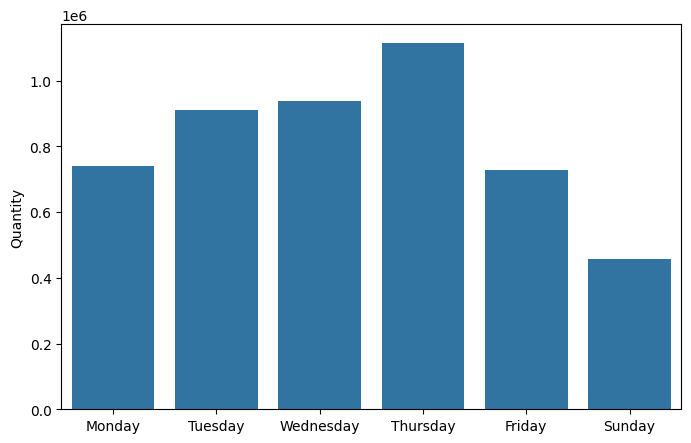

In [20]:
# Group by day of the week and sum sales
daily_sales = data.groupby(data['InvoiceDate'].dt.dayofweek)['Quantity'].sum()
print(daily_sales)
# we have Saturday missing in all sales
# Create a bar plot for daily sales
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']
plt.figure(figsize=(8, 5))
sns.barplot(x=days_of_week, y=daily_sales)

the top selling product based on the quantity sold

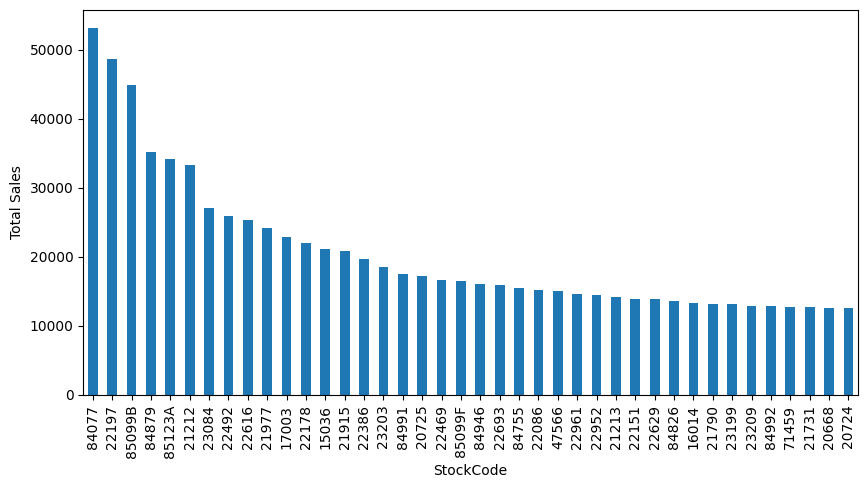

In [21]:

sales_by_products = data.groupby(data['StockCode'])['Quantity'].sum()
# print(sales_by_products)
plt.figure(figsize=(15, 6))
# sns.barplot(x=sales_by_products['StockCode'], y=sales_by_products['Quantity'])
sales_by_products.nlargest(40).plot(kind='bar', figsize=(10,5))
# plt.bar(sales_by_products['StockCode'], sales_by_products['Quantity'])
# plt.xlabel('Month')
plt.ylabel('Total Sales')
# plt.title('Monthly Sales Trend')
# plt.xticks(rotation=45)
plt.show()

the top selling countries based on the quantity sold

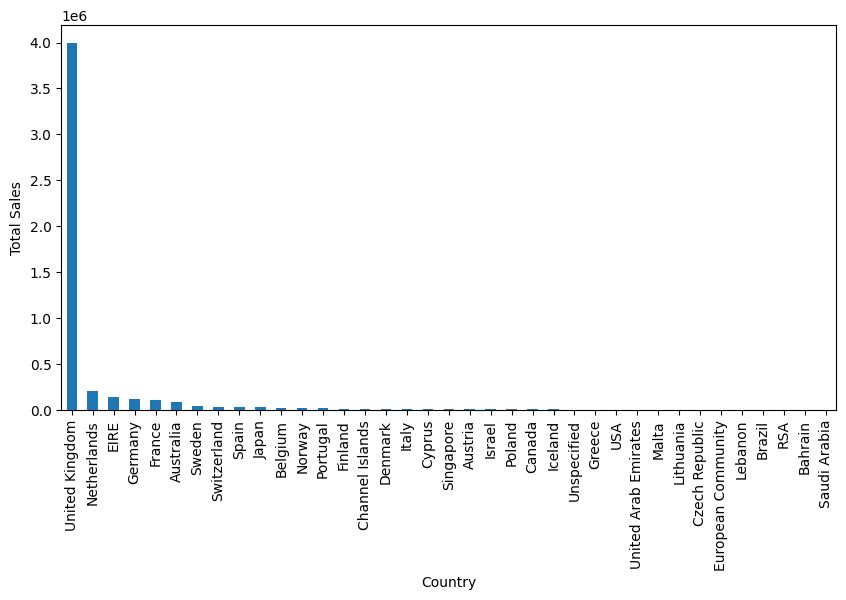

In [32]:

data.head()
sales_by_country = data.groupby(data['Country'])['Quantity'].sum()
plt.figure(figsize=(15, 6))

sales_by_country.nlargest(40).plot(kind='bar', figsize=(10,5))
plt.xlabel('Country')
plt.ylabel('Total Sales')
# plt.title('Monthly Sales Trend')
plt.show()

In our online retail business, data analysis reveals important insights. First, we cleaned the data by removing missing values and duplicates. Then, we explored the data, uncovering key trends. Notably, the UK stands out as our top-performing market. We have identified valuable insights to inform our business plan, such as monthly sales trends and profitable product categories. By focusing on the UK market and optimizing underperforming categories, we aim to enhance our business strategy continuously.